In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
from outlier_utils import createDataFrame, keepOnlyOutliers, outlier_detection,\
                is_extreme_point, calc_Precision, visualize_outliers, find_best_outliers_window

## IDX options

In [3]:
dir_path = '../results_pickle_format'

In [4]:
with open(f'{dir_path}/IDX_options.pkl', 'rb') as f:
    idx_opt = pickle.load(f)

In [5]:
with open(f'{dir_path}/n_beats_interval_8w_IDX_2007-2009.pkl', 'rb') as f:
    idx_nbeats_mapes = pickle.load(f)

In [6]:
with open(f'{dir_path}/ETS_interval_8w_IDX_2007-2009.pkl', 'rb') as f:
    idx_ETS_mapes = pickle.load(f)

In [7]:
with open(f'{dir_path}/prophet_interval_8w_IDX_2007-2009.pkl', 'rb') as f:
    idx_prophet_mapes = pickle.load(f)

In [8]:
with open(f'{dir_path}/arima_interval_8w_IDX_2007-2009.pkl', 'rb') as f:
    idx_arima_mapes = pickle.load(f)

In [9]:
idx_arima_df = createDataFrame(idx_arima_mapes, 'arima_mape')
idx_ETS_df = createDataFrame(idx_ETS_mapes, 'ETS_mape')
idx_prophet_df = createDataFrame(idx_prophet_mapes, 'prophet_mape')
idx_nbeats_df = createDataFrame(idx_nbeats_mapes, 'nbeats_mape').multiply(100) 

In [10]:
idx_arima_df.head(3)

arima_mape
Date                  
2007-01-15   23.672042
2007-01-22   30.229285
2007-01-29   48.076989

In [11]:
idx_ETS_df.head(3)

ETS_mape
Date                 
2007-01-15  27.797094
2007-01-22  59.486240
2007-01-29  54.427605

In [12]:
df = pd.concat([idx_arima_df, idx_ETS_df, idx_prophet_df, idx_nbeats_df],\
               axis=1)
df['wmape'] = (df['arima_mape'] + df['ETS_mape'] + df['prophet_mape'] + df['nbeats_mape'])/4
df.head(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2007-01-15   23.672042  27.797094     19.830044    14.908362  21.551885
2007-01-22   30.229285  59.486240     56.919867   122.102459  67.184463
2007-01-29   48.076989  54.427605     37.827407    23.608713  40.985179

In [13]:
idx_prophet_df.head(3)

prophet_mape
Date                    
2007-01-15     19.830044
2007-01-22     56.919867
2007-01-29     37.827407

In [14]:
idx_nbeats_df.head(3)

nbeats_mape
Date                   
2007-01-15    14.908362
2007-01-22   122.102459
2007-01-29    23.608713

We are try 4,5,6,7,8 weeks moving windows for finding if last week is outlier. 

In [15]:
arima_8w_outlier_windows = list(range(4,9))
arima_8w_best_interval, arima_8w_best_precision, arima_8w_anomalies = find_best_outliers_window(df, arima_8w_outlier_windows, idx_opt, 'arima_mape')

In [16]:
arima_8w_best_interval, arima_8w_best_precision, arima_8w_anomalies

(6,
 0.875,
 [datetime.datetime(2007, 8, 27, 0, 0),
  datetime.datetime(2007, 10, 29, 0, 0),
  datetime.datetime(2008, 7, 28, 0, 0),
  datetime.datetime(2008, 10, 20, 0, 0),
  datetime.datetime(2008, 12, 1, 0, 0),
  datetime.datetime(2009, 9, 14, 0, 0),
  datetime.datetime(2009, 10, 19, 0, 0),
  datetime.datetime(2009, 10, 26, 0, 0)])

In [17]:
ETS_8w_outlier_windows = list(range(4,9))
ETS_8w_best_interval, ETS_8w_best_precision, ETS_8w_anomalies = find_best_outliers_window(df, ETS_8w_outlier_windows, idx_opt, 'ETS_mape')

In [18]:
ETS_8w_best_interval, ETS_8w_best_precision, ETS_8w_anomalies

(4,
 0.5714285714285714,
 [datetime.datetime(2007, 2, 12, 0, 0),
  datetime.datetime(2007, 3, 19, 0, 0),
  datetime.datetime(2007, 5, 7, 0, 0),
  datetime.datetime(2007, 6, 4, 0, 0),
  datetime.datetime(2008, 2, 4, 0, 0),
  datetime.datetime(2008, 3, 31, 0, 0),
  datetime.datetime(2008, 7, 28, 0, 0),
  datetime.datetime(2008, 8, 25, 0, 0),
  datetime.datetime(2008, 10, 20, 0, 0),
  datetime.datetime(2008, 12, 29, 0, 0),
  datetime.datetime(2009, 1, 26, 0, 0),
  datetime.datetime(2009, 8, 31, 0, 0),
  datetime.datetime(2009, 11, 23, 0, 0),
  datetime.datetime(2009, 12, 28, 0, 0)])

In [19]:
prophet_8w_outlier_windows = list(range(4,9))
prophet_8w_best_interval, prophet_8w_best_precision, prophet_8w_anomalies = find_best_outliers_window(df, prophet_8w_outlier_windows, idx_opt, 'prophet_mape')

In [20]:
prophet_8w_best_interval, prophet_8w_best_precision, prophet_8w_anomalies

(6,
 0.6666666666666666,
 [datetime.datetime(2007, 2, 26, 0, 0),
  datetime.datetime(2007, 3, 5, 0, 0),
  datetime.datetime(2007, 3, 26, 0, 0),
  datetime.datetime(2007, 6, 4, 0, 0),
  datetime.datetime(2007, 8, 27, 0, 0),
  datetime.datetime(2008, 7, 28, 0, 0),
  datetime.datetime(2008, 10, 20, 0, 0),
  datetime.datetime(2008, 10, 27, 0, 0),
  datetime.datetime(2008, 12, 8, 0, 0),
  datetime.datetime(2008, 12, 29, 0, 0),
  datetime.datetime(2009, 3, 9, 0, 0),
  datetime.datetime(2009, 11, 30, 0, 0)])

In [21]:
nbeats_8w_outlier_windows = list(range(4,9))
nbeats_8w_best_interval, nbeats_8w_best_precision, nbeats_8w_anomalies = find_best_outliers_window(df, nbeats_8w_outlier_windows, idx_opt, 'nbeats_mape')

In [22]:
nbeats_8w_best_interval, nbeats_8w_best_precision, nbeats_8w_anomalies

(5,
 0.6666666666666666,
 [datetime.datetime(2007, 3, 5, 0, 0),
  datetime.datetime(2007, 4, 23, 0, 0),
  datetime.datetime(2007, 7, 9, 0, 0),
  datetime.datetime(2007, 7, 30, 0, 0),
  datetime.datetime(2007, 10, 1, 0, 0),
  datetime.datetime(2007, 10, 8, 0, 0),
  datetime.datetime(2008, 1, 21, 0, 0),
  datetime.datetime(2008, 3, 17, 0, 0),
  datetime.datetime(2008, 9, 22, 0, 0),
  datetime.datetime(2009, 2, 9, 0, 0),
  datetime.datetime(2009, 2, 23, 0, 0),
  datetime.datetime(2009, 8, 17, 0, 0)])

In [23]:
wmape_8w_outlier_windows = list(range(4,9))
wmape_8w_best_interval, wmape_8w_best_precision, wmape_8w_anomalies = find_best_outliers_window(df, wmape_8w_outlier_windows, idx_opt, 'wmape')

In [24]:
wmape_8w_best_interval, wmape_8w_best_precision, wmape_8w_anomalies 

(4,
 0.625,
 [datetime.datetime(2007, 5, 14, 0, 0),
  datetime.datetime(2007, 7, 2, 0, 0),
  datetime.datetime(2007, 8, 27, 0, 0),
  datetime.datetime(2007, 10, 8, 0, 0),
  datetime.datetime(2008, 3, 31, 0, 0),
  datetime.datetime(2008, 6, 16, 0, 0),
  datetime.datetime(2008, 8, 25, 0, 0),
  datetime.datetime(2008, 10, 20, 0, 0),
  datetime.datetime(2008, 12, 1, 0, 0),
  datetime.datetime(2008, 12, 29, 0, 0),
  datetime.datetime(2009, 3, 30, 0, 0),
  datetime.datetime(2009, 5, 25, 0, 0),
  datetime.datetime(2009, 6, 29, 0, 0),
  datetime.datetime(2009, 8, 31, 0, 0),
  datetime.datetime(2009, 11, 9, 0, 0),
  datetime.datetime(2009, 12, 28, 0, 0)])

In [25]:
df.tail(3)

arima_mape    ETS_mape  prophet_mape  nbeats_mape       wmape
Date                                                                     
2009-12-21   26.852912   32.080959     28.464647    29.772917   29.292859
2009-12-28  112.139475  126.939352    131.535929    52.603414  105.804543
2010-01-04   22.530465   25.087243     18.800490    26.693162   23.277840

<AxesSubplot:xlabel='Date'>

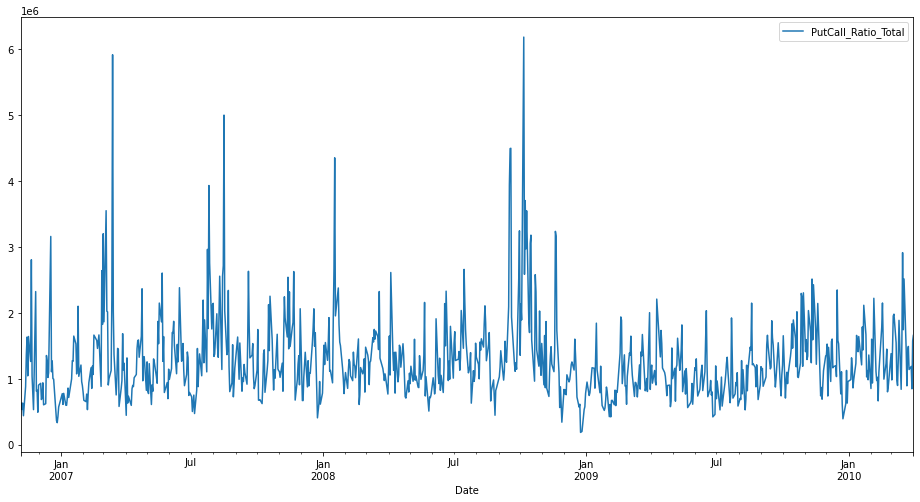

In [26]:
idx_opt[:'2010-04-01'].plot(figsize=(16,8))

In [27]:
idx_opt1 = idx_opt[:'2010-04-01']

In [28]:
arima_detection = outlier_detection(idx_opt1, arima_8w_anomalies)
ETS_detection = outlier_detection(idx_opt1, ETS_8w_anomalies)
prophet_detection = outlier_detection(idx_opt1, prophet_8w_anomalies)
nbeats_detection = outlier_detection(idx_opt1, nbeats_8w_anomalies)
average_detection = outlier_detection(idx_opt1, wmape_8w_anomalies)

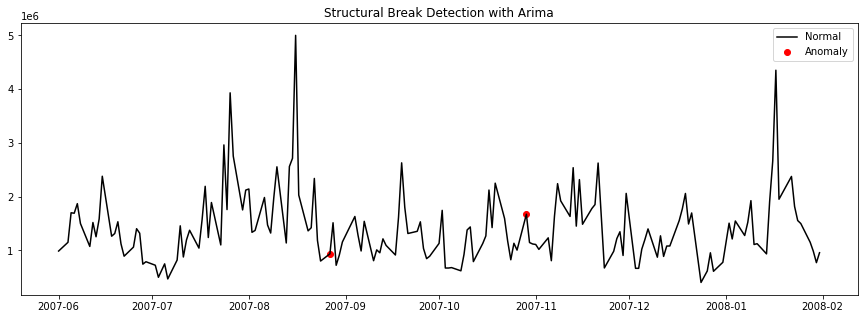

In [29]:
visualize_outliers(arima_detection, 'Arima', '2007-06-01', '2008-01-31') 

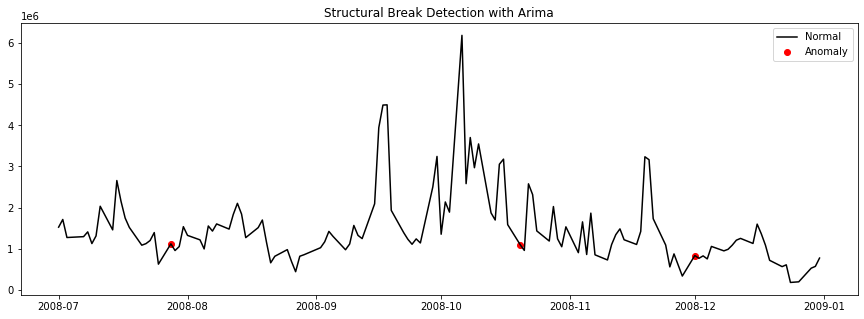

In [30]:
visualize_outliers(arima_detection, 'Arima', '2008-07-01', '2008-12-31') 

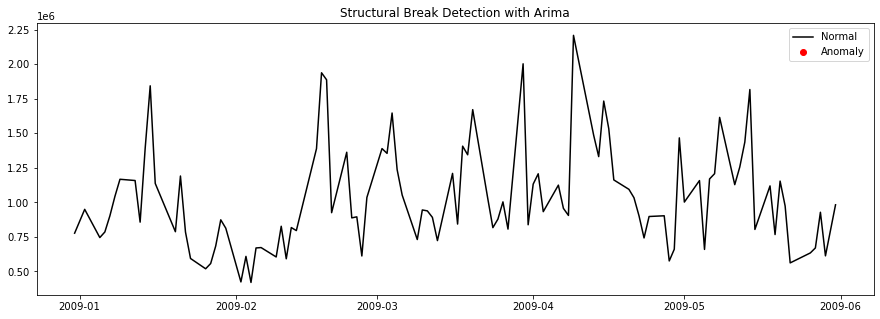

In [31]:
visualize_outliers(arima_detection, 'Arima', '2008-12-31', '2009-05-31') 

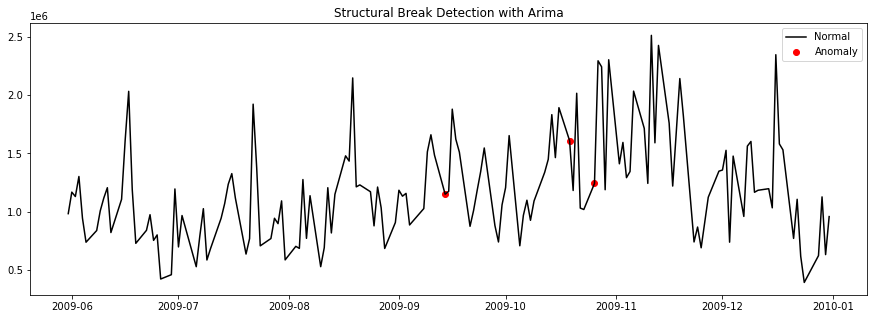

In [32]:
visualize_outliers(arima_detection, 'Arima', '2009-05-31', '2009-12-31') 

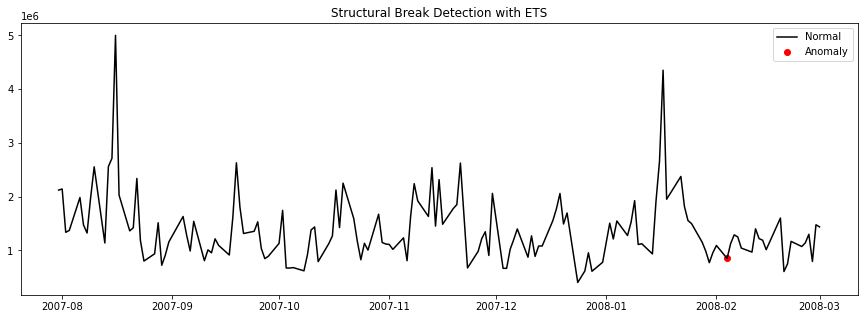

In [33]:
visualize_outliers(ETS_detection, 'ETS', '2007-07-31', '2008-03-01') 

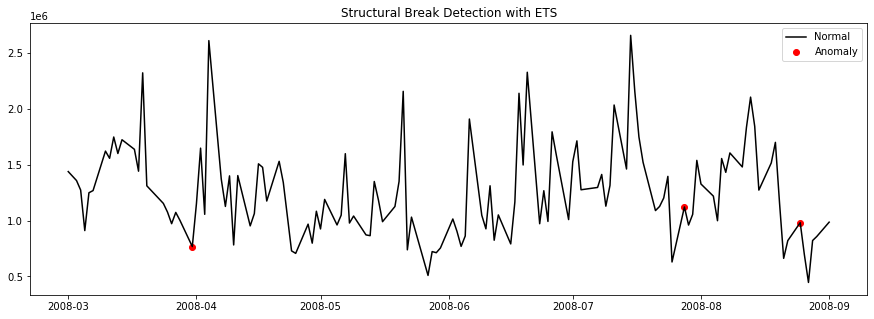

In [34]:
visualize_outliers(ETS_detection, 'ETS', '2008-03-01', '2008-09-01') 

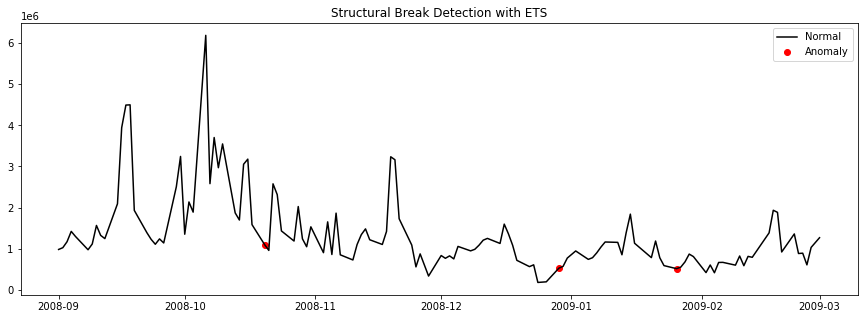

In [35]:
visualize_outliers(ETS_detection, 'ETS', '2008-09-01', '2009-03-01') 

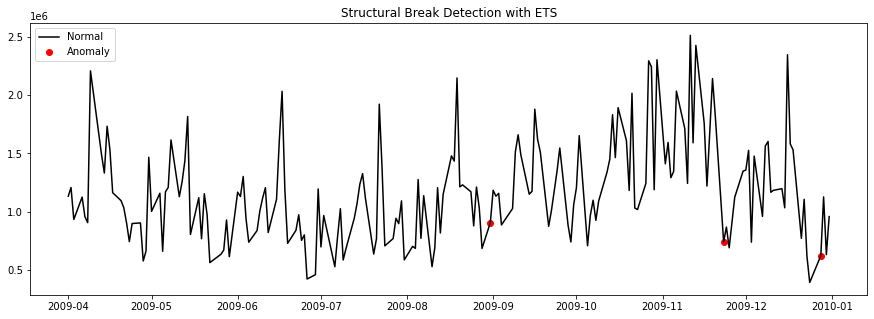

In [36]:
visualize_outliers(ETS_detection, 'ETS', '2009-04-01', '2009-12-31') 

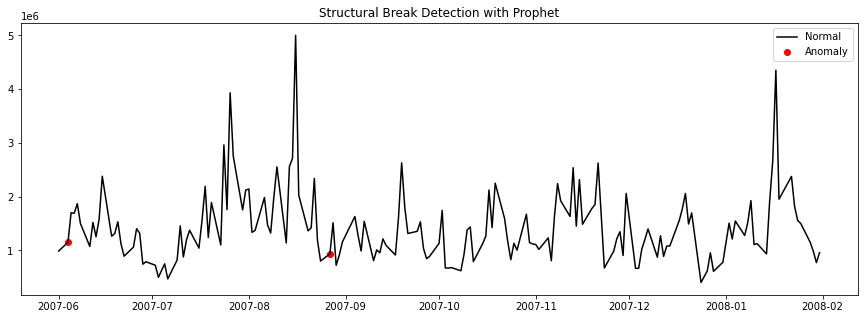

In [37]:
visualize_outliers(prophet_detection, 'Prophet', '2007-06-01', '2008-01-31') 

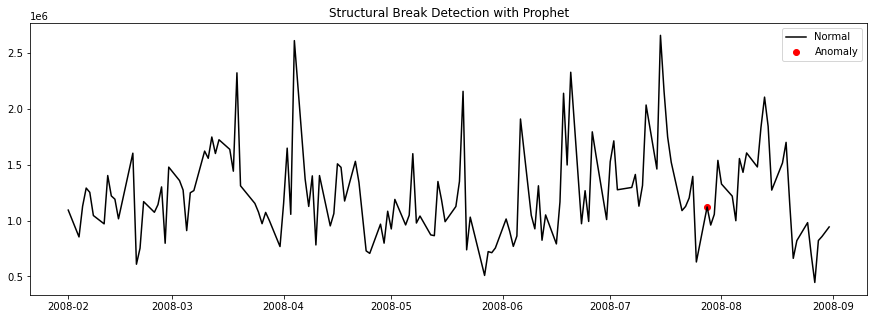

In [38]:
visualize_outliers(prophet_detection, 'Prophet', '2008-02-01', '2008-08-31') 

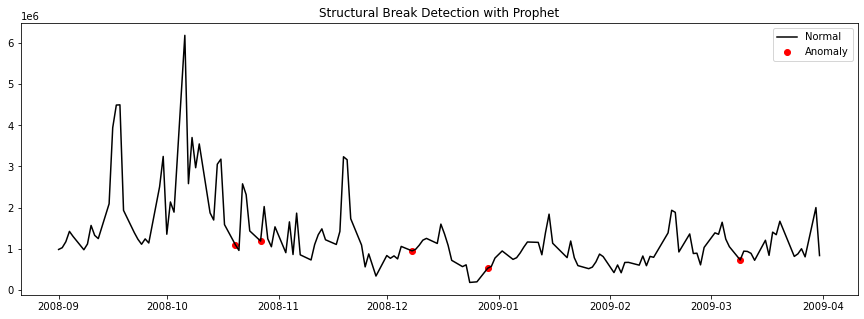

In [39]:
visualize_outliers(prophet_detection, 'Prophet', '2008-09-01', '2009-03-31') 

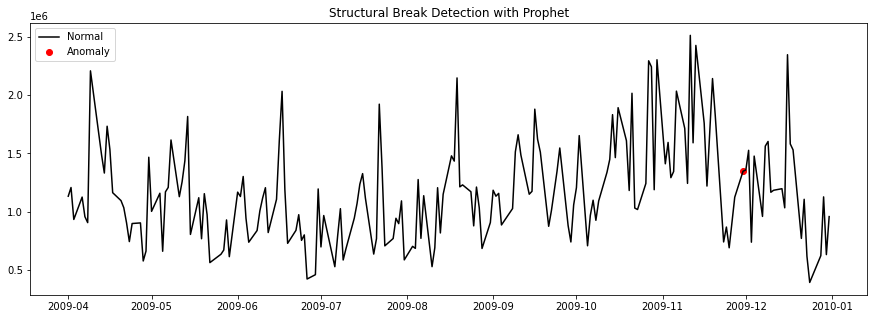

In [40]:
visualize_outliers(prophet_detection, 'Prophet', '2009-04-01', '2009-12-31') 

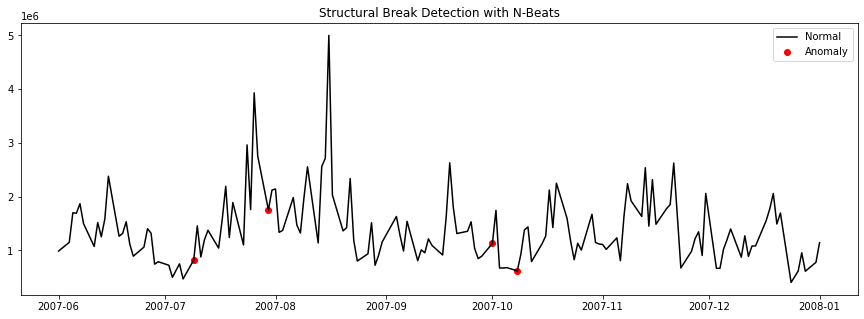

In [41]:
visualize_outliers(nbeats_detection, 'N-Beats', '2007-06-01', '2008-01-01') 

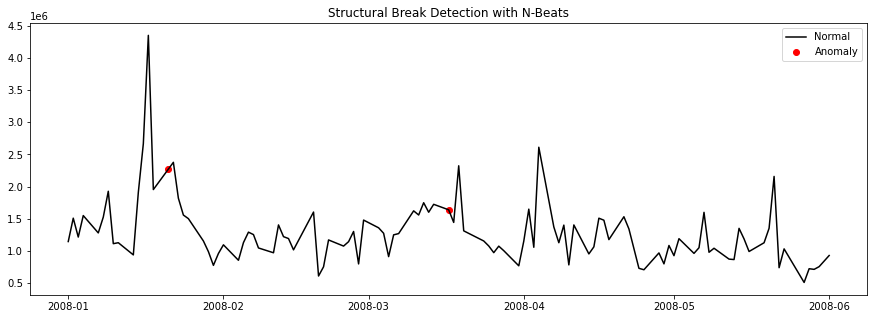

In [42]:
visualize_outliers(nbeats_detection, 'N-Beats', '2008-01-01', '2008-06-01') 

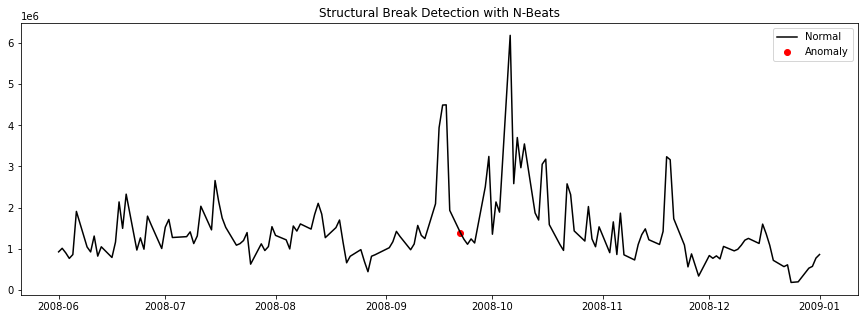

In [43]:
visualize_outliers(nbeats_detection, 'N-Beats', '2008-06-01', '2009-01-01') 

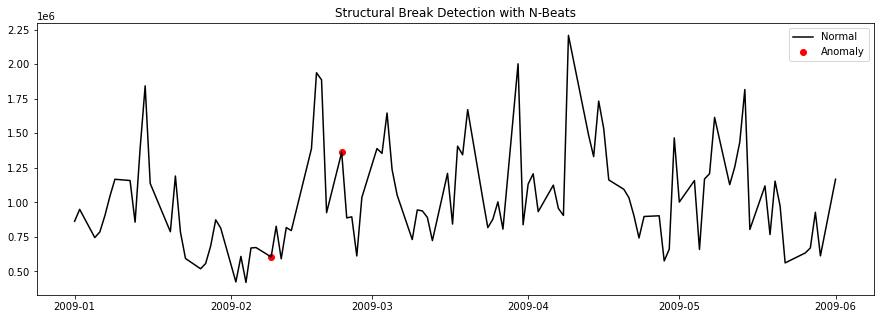

In [44]:
visualize_outliers(nbeats_detection, 'N-Beats', '2009-01-01', '2009-06-01') 

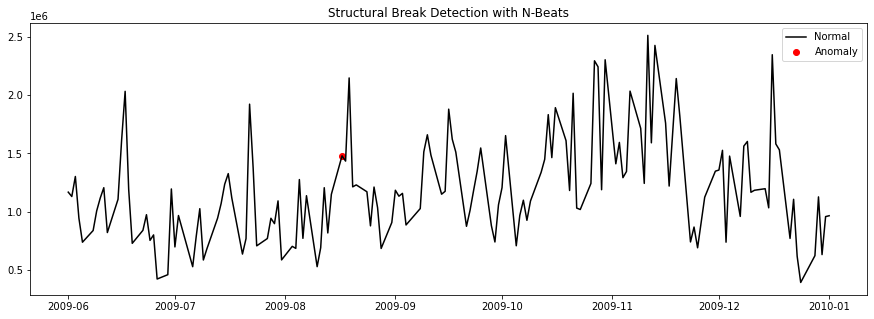

In [45]:
visualize_outliers(nbeats_detection, 'N-Beats', '2009-06-01', '2010-01-01') 

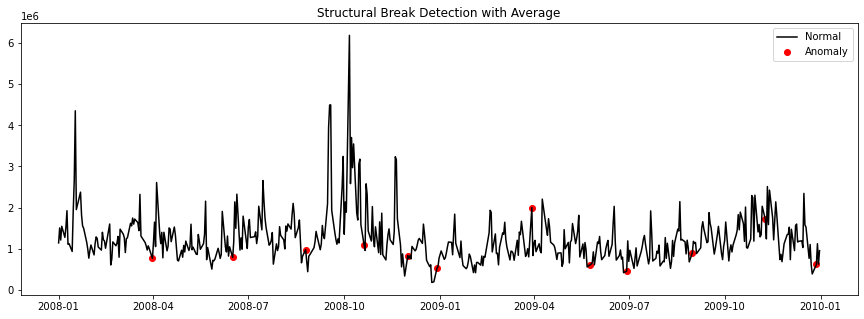

In [44]:
visualize_outliers(average_detection, 'Average', '2008-01-01', '2009-12-31') 

Check precision (anomalies at extreme points)

In [46]:
arima_8w_best_interval, arima_8w_best_precision

(6, 0.875)

In [47]:
ETS_8w_best_interval, ETS_8w_best_precision

(4, 0.5714285714285714)

In [48]:
prophet_8w_best_interval, prophet_8w_best_precision

(6, 0.6666666666666666)

In [49]:
nbeats_8w_best_interval, nbeats_8w_best_precision

(5, 0.6666666666666666)

In [50]:
wmape_8w_best_interval, wmape_8w_best_precision

(4, 0.625)